Just looking at the HET data

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from scipy.optimize import leastsq
from scipy.interpolate import interp1d
from astropy.modeling import models, fitting
from astropy.time import Time

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [88]:
hetpath = '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/'

hetspecs = glob.glob('{}spectrum*d.fits'.format(hetpath)) #just the red arm
hetspecs

['/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211216_0000010_exp01_farred.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211216_0000010_exp01_red.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211229_0000008_exp01_farred.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211229_0000008_exp01_red.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211229_0000008_exp02_farred.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20211229_0000008_exp02_red.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20220103_0000009_exp01_red.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20220103_0000009_exp02_farred.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20220103_0000009_exp02_red.fits',
 '/media/david/2tb_ext_hd/hddata/het_gas/UT22-1-013/spectrum_20220117_0000010_exp01_farred.fits',
 '/media/david/2tb_ext_hd/hddata/he

WDJ0147+2339_066_W


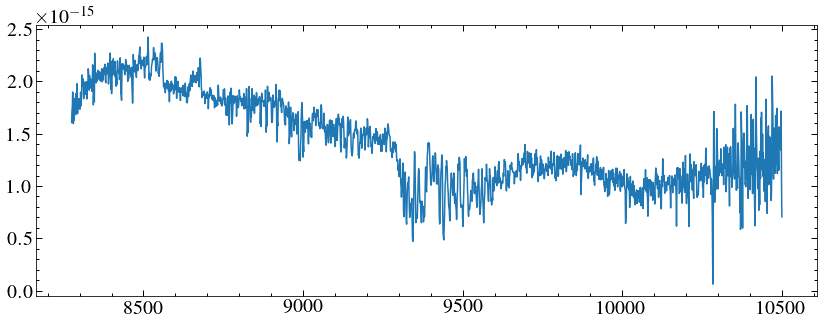

WDJ0147+2339_066_W


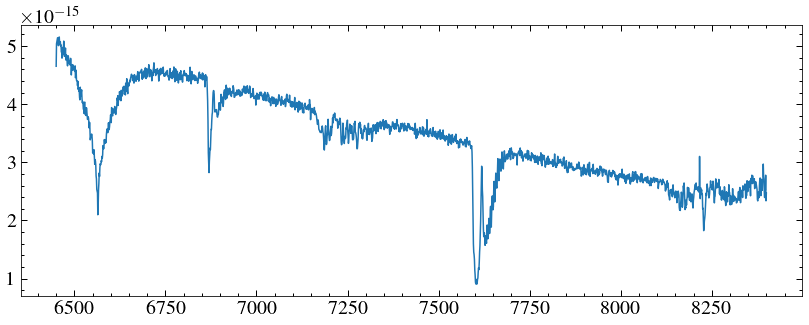

WDJ0845+2257_066_W


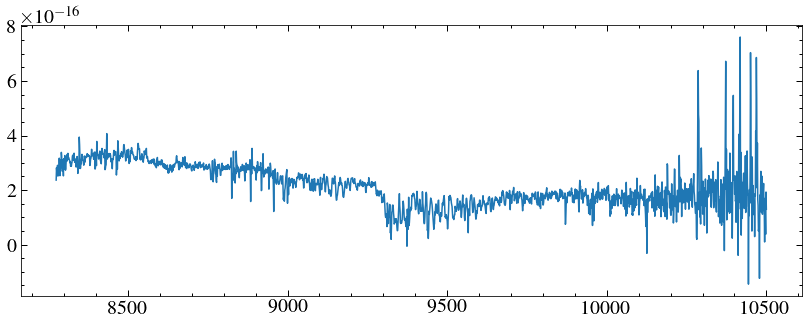

WDJ0845+2257_066_W


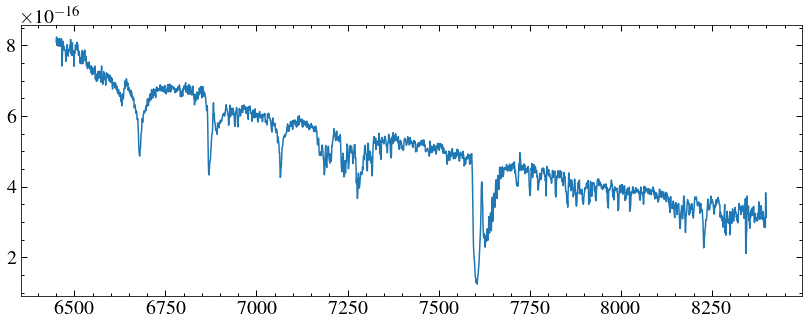

WDJ0845+2257_066_W


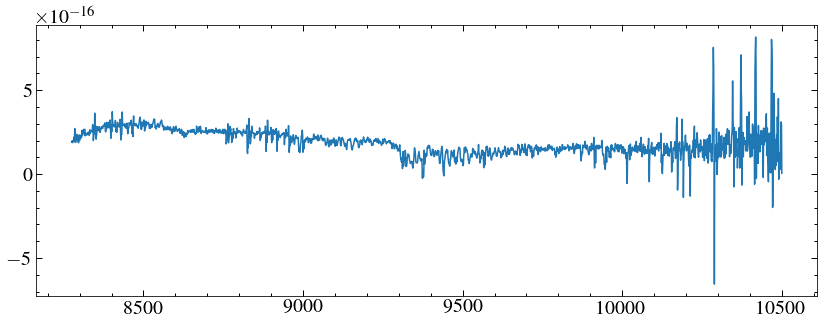

WDJ0845+2257_066_W


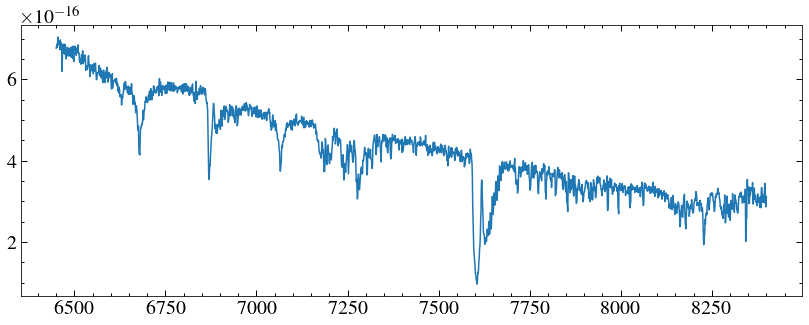

WDJ0147+2339_066_W


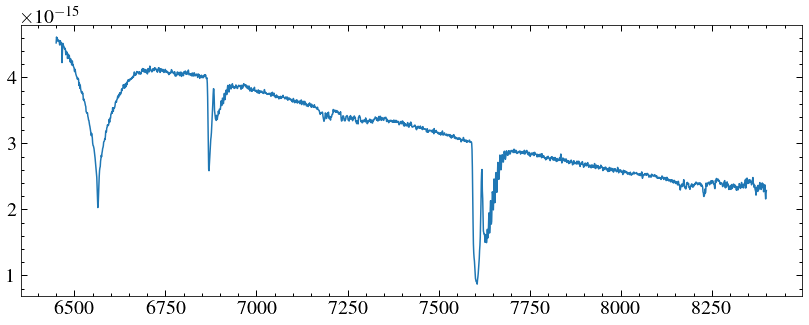

WDJ0147+2339_066_W


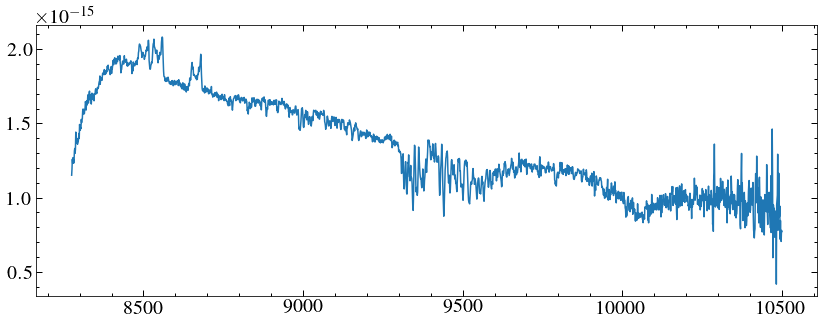

WDJ0147+2339_066_W


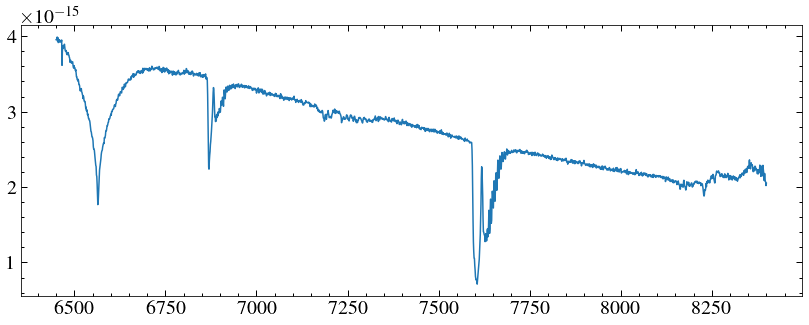

WDJ0147+2339_066_W


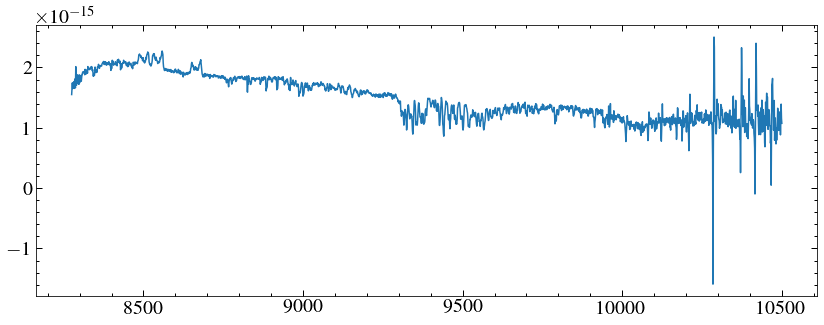

WDJ0147+2339_066_W


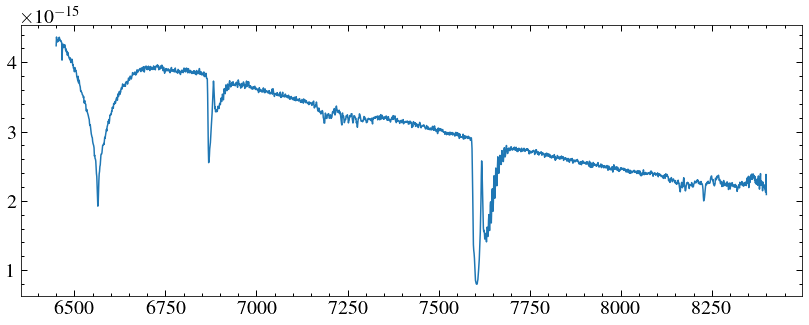

WDJ0147+2339_066_W


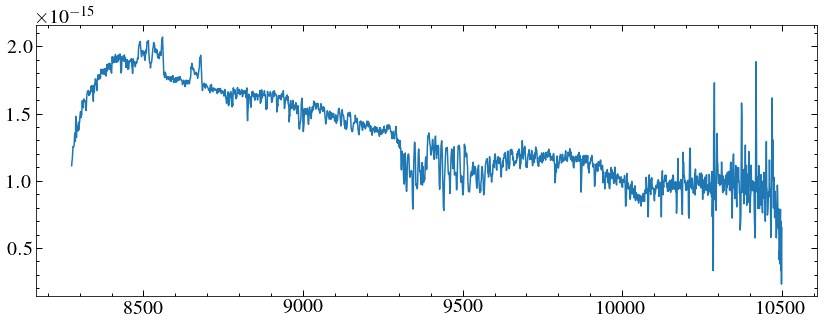

WDJ0147+2339_066_W


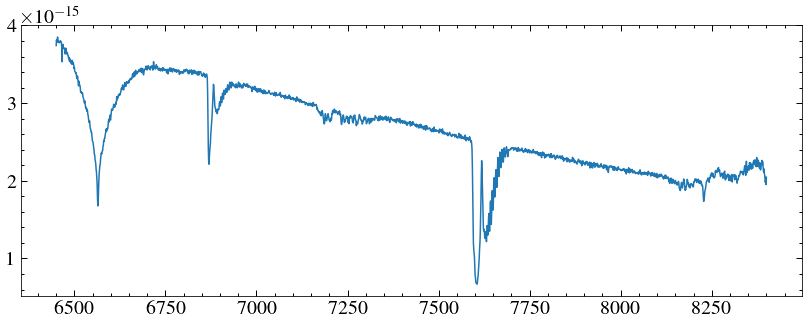

WDJ0845+2257_066_W


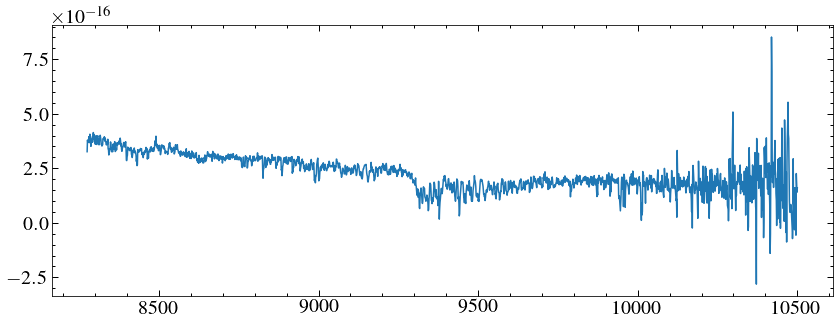

WDJ0845+2257_066_W


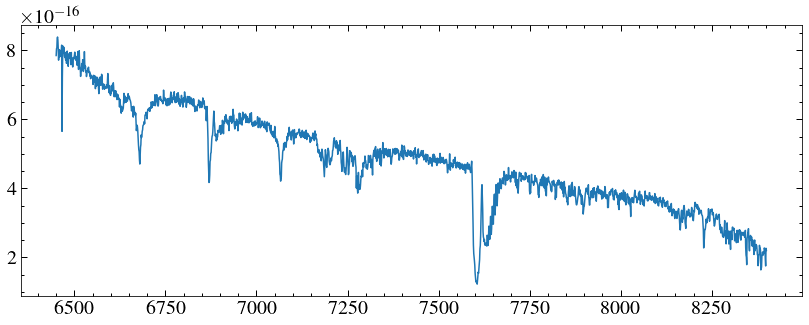

WDJ0845+2257_066_W


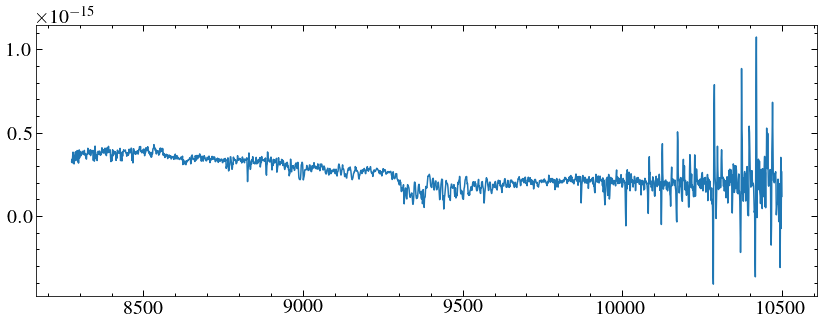

WDJ0845+2257_066_W


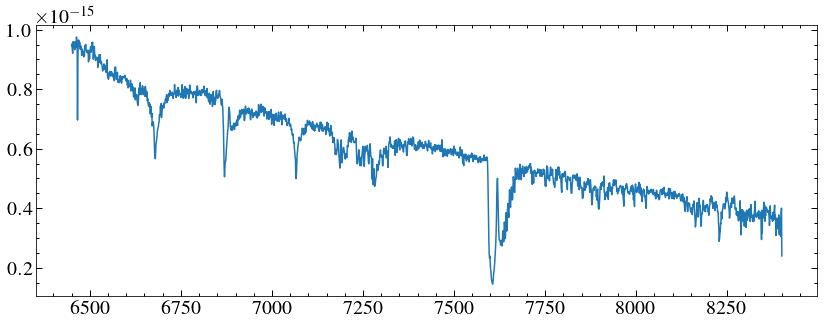

WDJ0347+1624_066_W


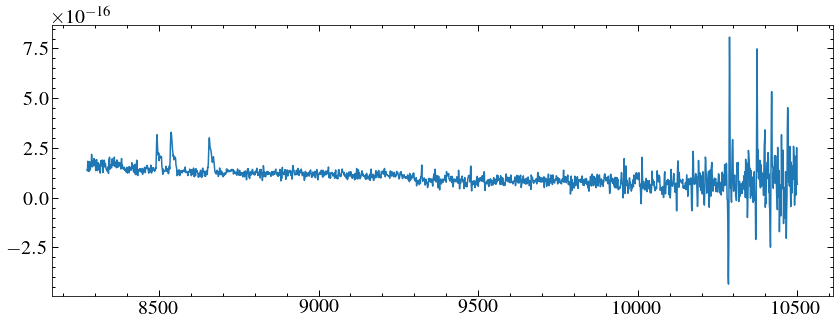

WDJ0147+2339_066_W


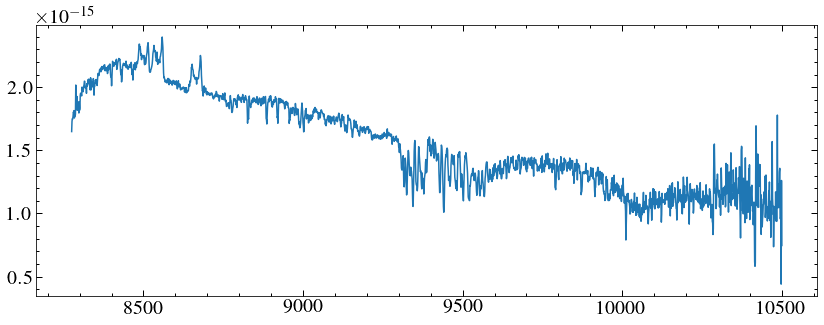

WDJ0347+1624_066_W


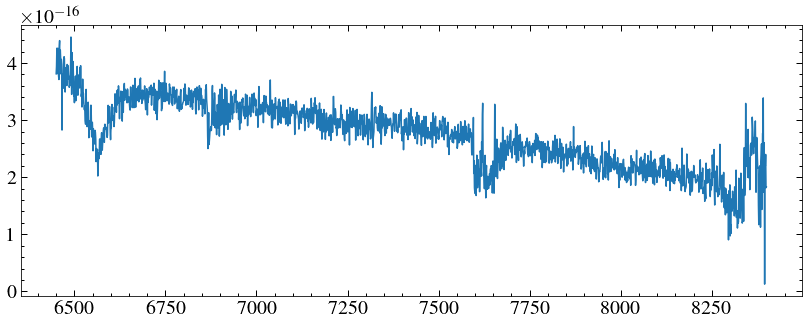

WDJ0347+1624_066_W


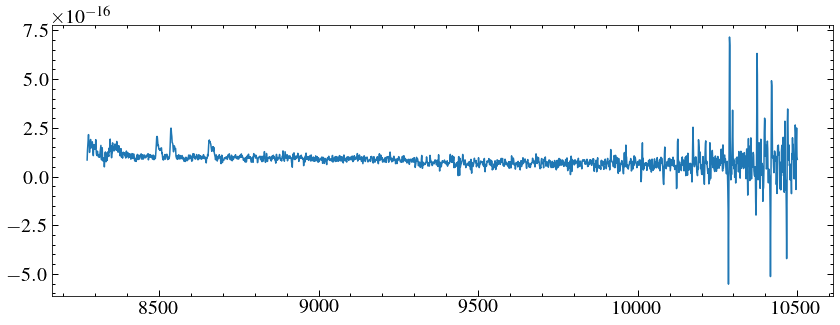

WDJ0347+1624_066_W


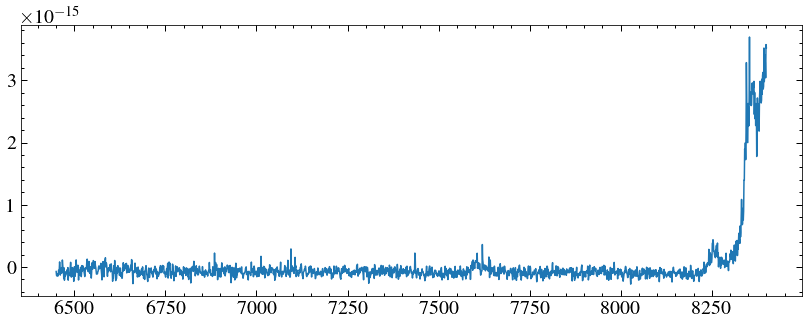

WDJ0845+2257_066_E


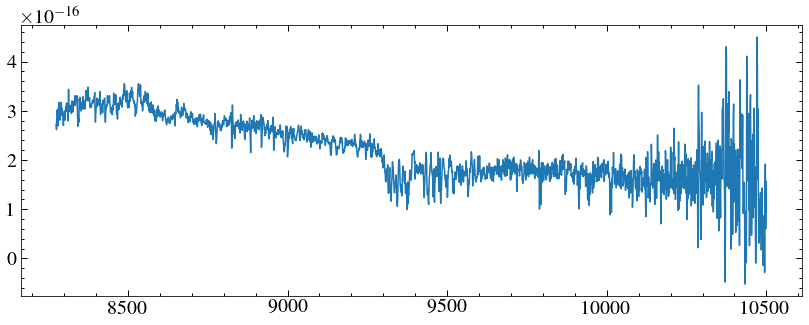

WDJ0845+2257_066_E


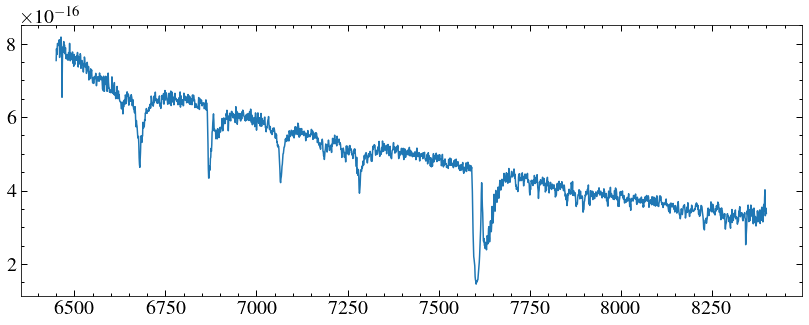

WDJ0845+2257_066_E


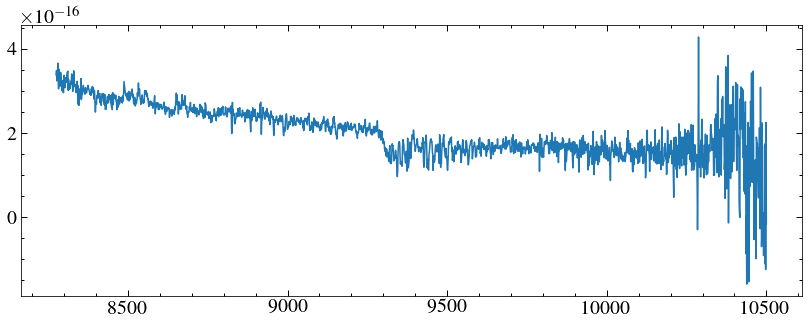

WDJ0845+2257_066_E


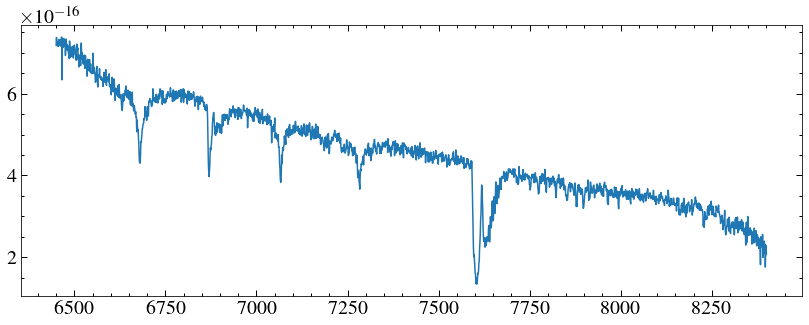

WDJ0846+5703_066_E


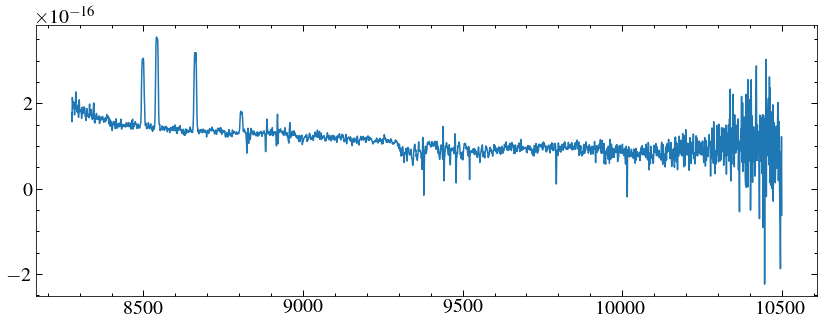

WDJ0846+5703_066_E


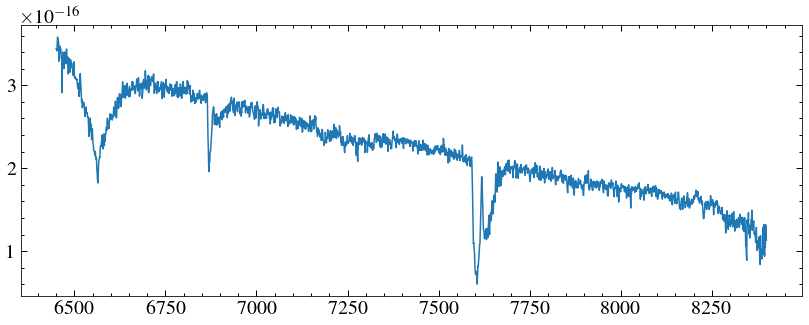

WDJ0846+5703_066_E


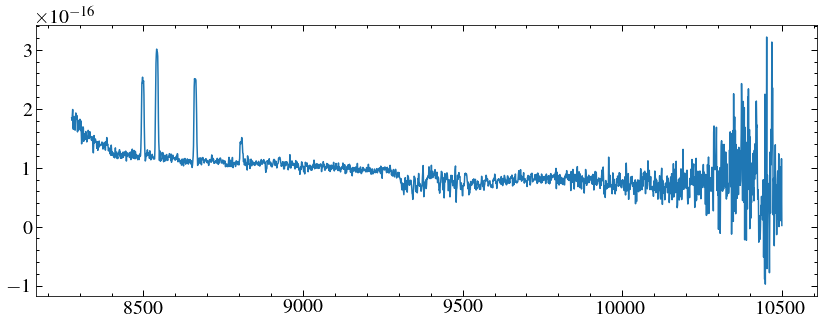

WDJ0846+5703_066_E


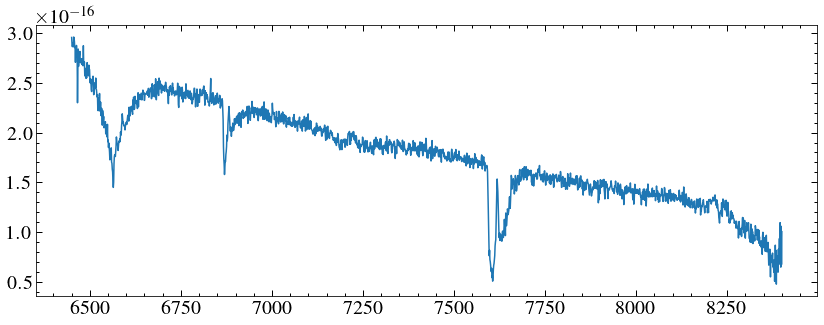

WDJ0347+1624_066_W


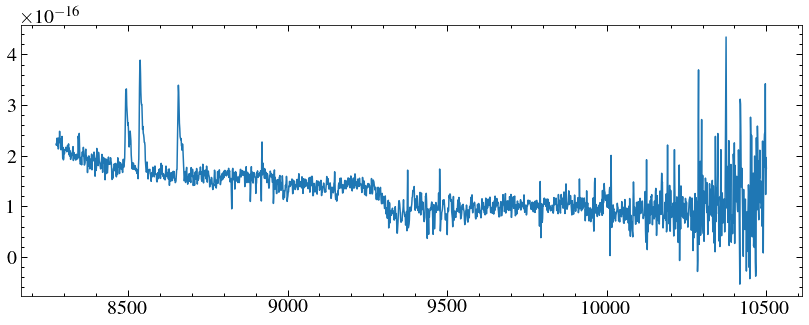

WDJ0347+1624_066_W


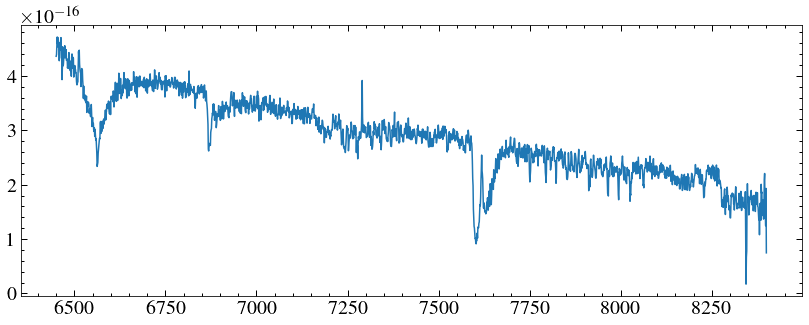

WDJ0347+1624_066_W


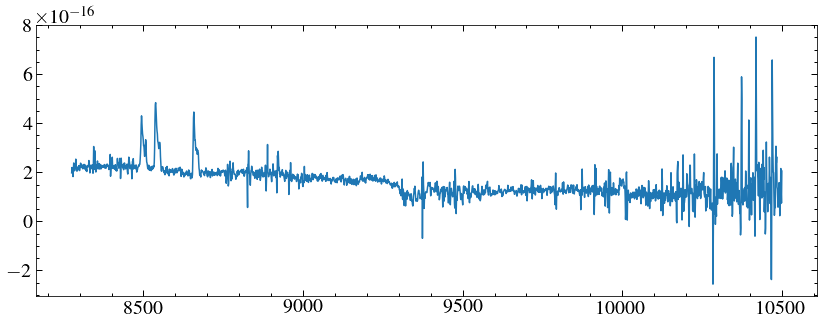

WDJ0347+1624_066_W


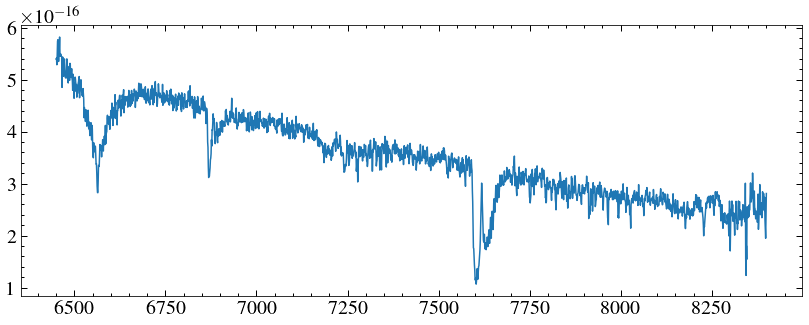

WDJ1622+5840_066_E


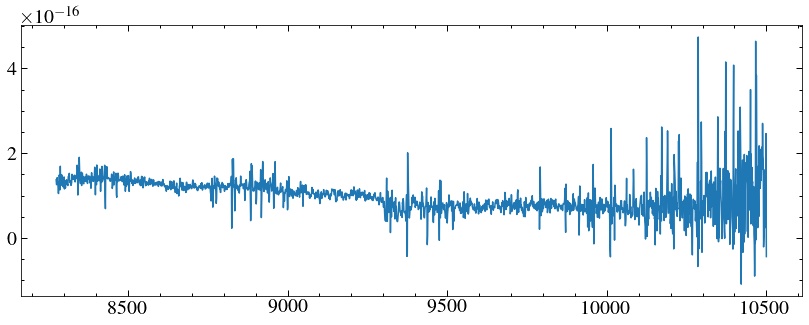

WDJ1622+5840_066_E


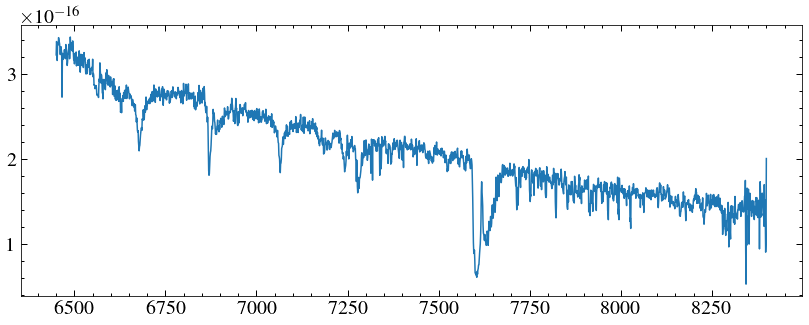

WDJ1622+5840_066_E


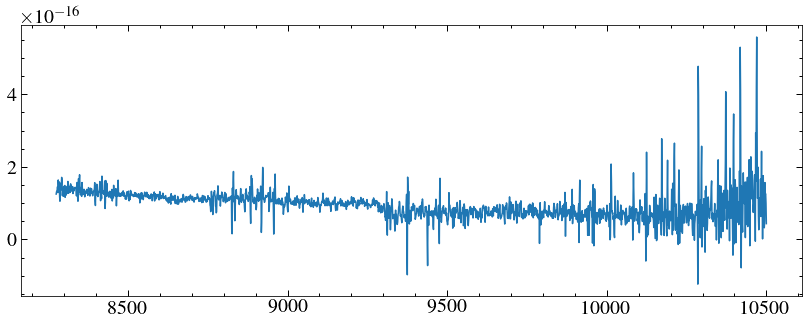

WDJ1622+5840_066_E


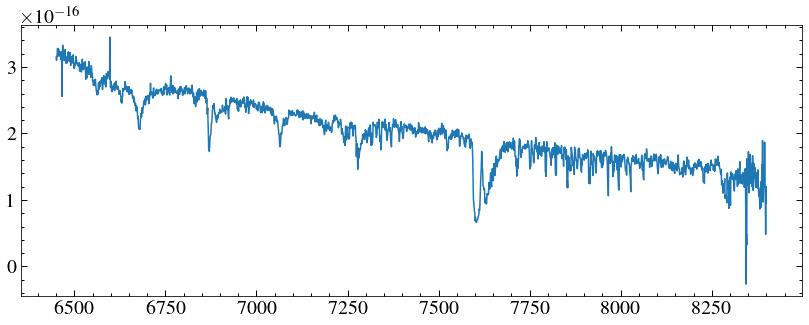

['WDJ0147+2339_066_W' 'WDJ0347+1624_066_W' 'WDJ0845+2257_066_E'
 'WDJ0845+2257_066_W' 'WDJ0846+5703_066_E' 'WDJ1622+5840_066_E']


In [89]:
stars = []
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    print(star)
    stars.append(star)
    w, f, e = data[0], data[1], data[3]
    plt.plot(w,f)
    plt.show()
print(np.unique(np.array(stars)))

In [90]:
def make_plot_spec(w, f, e, mask1, mask2, smooth=10): #cuts spectrum down to the bit to plot
    #mask = (w > 8450) & (w < 8480) | (w > 8520) & (w <8540) | (w > 8560) & (w< 8660) | (w > 8680) & (w < 8700) #mask out emmission lines
    fitter = fitting.LinearLSQFitter()
    w1, f1 = w[mask1], f[mask1]
    n_init = models.Polynomial1D(3)
    n_fit = fitter(n_init, w1, f1)
    #mask = (w > 8450) & (w < 8700)
    nf = f/n_fit(w)
    ne = e/n_fit(w)
    if smooth == 0:
        smooth = 1
    nf = convolve(nf,Box1DKernel(smooth))
    ne = convolve(ne,Box1DKernel(smooth))/smooth**0.5
    w1, f1, e1 = w[mask2], nf[mask2], ne[mask2]
    return w1,f1, e1
    

In [91]:
# frspecs = [hetspecs[0], hetspecs[2], hetspecs[4]]
# for frspec in frspecs:
#     data = fits.getdata(frspec)
#     w, f, e = data[0], data[1], data[3]
#     # trips = [[8475,8520], [8520,8560], [8645, 8680]]

#     # trips2 = [[8480,8525], [8525,8565], [8645, 8685]]

#     # mask1 = (w > 8400) & (w < 8475) | (w > 8515) & (w < 8522) | (w > 8565)  & (w< 8640) | (w > 8685) & (w < 8750)
#     # mask1 = (w > 8435) & (w < 8440) |(w > 8470) & (w < 8480) | (w > 8520) & (w < 8522) | (w > 8565)  & (w< 8638) | (w > 8685) & (w < 8750)
#     mask2 = (w> 8450) & (w < 8700) 
#     wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=4)
#     plt.step(wn, fn, where='mid')
#     plt.xlim(8451, 8699)

#     # for trip in trips:
#         # [plt.axvline(line) for line in trip]

#     # for trip in trips2:
#         # [plt.axvline(line, c='C1') for line in trip]  

In [92]:
# plt.plot(w, f/e)
# print(np.median(f[w <8800]/e[w<8800]))

Stitching/cutting the overlap?  

In [93]:
# # for spec in hetspecs[8:]:
# #     data = fits.getdata(spec)
# #     star = fits.getheader(spec)['OBJECT']
# #     print(star)
# #     w, f, e = data[0], data[1], data[3]
# #     plt.plot(w,f)
# #     # plt.show()
# #     plt.xlim(8000, 8500)
# #     plt.ylim(1e-15, 3e-15)
    
# data1 = fits.getdata(hetspecs[9])
# w1, f1, e1 = data1[0], data1[1], data1[3]


# data2 = fits.getdata(hetspecs[8])
# w2, f2, e2 = data2[0], data2[1], data2[3]

# plt.plot(w1, f1)
# plt.plot(w2, f2)

# plt.xlim(8000, 8500)
# plt.ylim(1e-15, 3e-15)

# m1 = (w1 >w2[0])
# m2 = (w2 <w1[-1])
# plt.plot(w1[m1], f1[m1])
# plt.plot(w2[m2], f2[m2])

# f1i = interp1d(w1[m1], f1[m1], fill_value='extrapolate')(w2[m2])
# f3 = np.mean([f1i, f2[m2]], axis=0)
# plt.plot(w2[m2], f3)


In [94]:
# plt.plot(data[0], data[2])
# plt.plot(data[0], data[1])

In [95]:
# fits.getheader(spec)

In [96]:
for spec in hetspecs:
    data = fits.getdata(spec)
    hdr = fits.getheader(spec)
    star, date, inst, wave0 = hdr['QOBJECT'], hdr['DATE'], hdr['INSTRUME'],hdr['WAVE0']
    if wave0 > 8000 and wave0 < 9000: #arms not in header!!!???
        arm = 'farred'
    if wave0 > 6000 and wave0 < 7000: #arms not in header!!!???
        arm = 'red___'
    # print(star, date, inst)
    fname = '{}_{}_{}_{}.dat'.format(star, inst, arm, date)
    print(fname)
    # print(hdr['WAVE0'])
    w, f, e = data[0], data[1], data[3]
    # plt.plot(w,f)
    # plt.show()
    savdat = Table([w, f, e], names=['#WAVELENGTH', 'FLUX', 'ERROR'])
    ascii.write(savdat, 'het_spectra/{}'.format(fname), overwrite=True, format='basic')

WDJ0147+2339_lrs2_farred_2021-12-16T05:49:17.947919.dat
WDJ0147+2339_lrs2_red____2021-12-16T05:49:17.617484.dat
WDJ0845+2257_lrs2_farred_2021-12-29T11:47:52.748397.dat
WDJ0845+2257_lrs2_red____2021-12-29T11:47:52.417540.dat
WDJ0845+2257_lrs2_farred_2021-12-29T11:59:04.850174.dat
WDJ0845+2257_lrs2_red____2021-12-29T11:59:04.519410.dat
WDJ0147+2339_lrs2_red____2022-01-03T04:37:20.925239.dat
WDJ0147+2339_lrs2_farred_2022-01-03T04:46:03.512716.dat
WDJ0147+2339_lrs2_red____2022-01-03T04:46:03.179742.dat
WDJ0147+2339_lrs2_farred_2022-01-17T03:43:08.863359.dat
WDJ0147+2339_lrs2_red____2022-01-17T03:43:08.530105.dat
WDJ0147+2339_lrs2_farred_2022-01-17T03:51:51.471013.dat
WDJ0147+2339_lrs2_red____2022-01-17T03:51:51.137135.dat
WDJ0845+2257_lrs2_farred_2022-01-23T10:02:09.157665.dat
WDJ0845+2257_lrs2_red____2022-01-23T10:02:08.827022.dat
WDJ0845+2257_lrs2_farred_2022-01-23T10:13:23.274111.dat
WDJ0845+2257_lrs2_red____2022-01-23T10:13:22.943095.dat
WDJ0347+1624_lrs2_farred_2022-02-09T03:52:39.364

In [97]:
# for spec in glob.glob('het_spectra/*'):
#     w, f, e = np.loadtxt(spec, unpack=True)
#     print(spec)
#     plt.plot(w,f)
#     plt.show()

(1.5e-15, 2.5e-15)

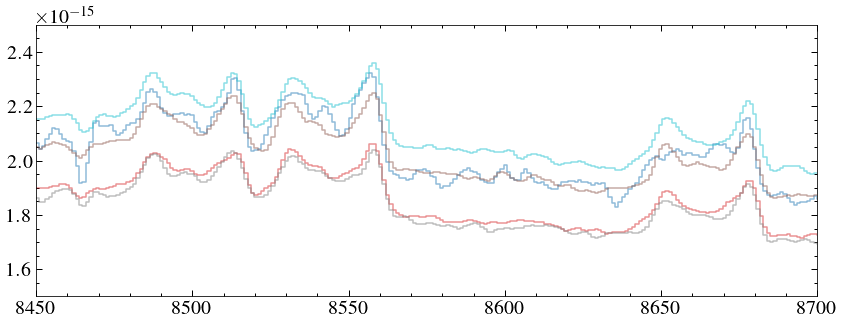

In [98]:
smooth = 4
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    if star == 'WDJ0147+2339_066_W': 
        w, f, e = data[0], data[1], data[3]
        f = convolve(f,Box1DKernel(smooth))
        plt.step(w,f, alpha =0.5)
plt.xlim(8450, 8700)
plt.ylim (1.5e-15, 2.5e-15)
    # plt.show()


(1e-17, 4e-16)

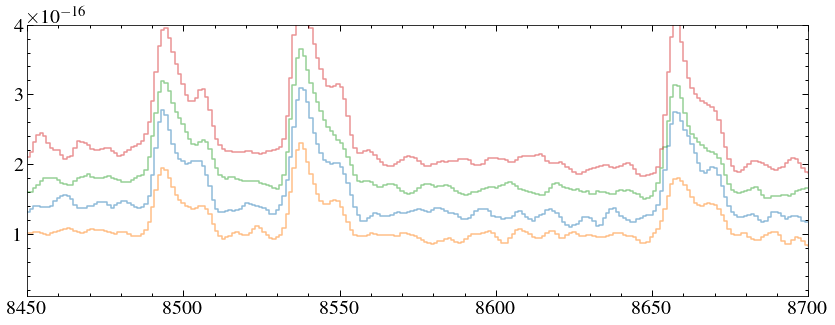

In [99]:
smooth = 4
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    if star == 'WDJ0347+1624_066_W': 
        w, f, e = data[0], data[1], data[3]
        if w [-1] > 9000:
            f = convolve(f,Box1DKernel(smooth))
            plt.step(w,f, alpha =0.5)
plt.xlim(8450, 8700)
plt.ylim (0.1e-16, 4e-16)
    # plt.show()


 [astropy.modeling.fitting]


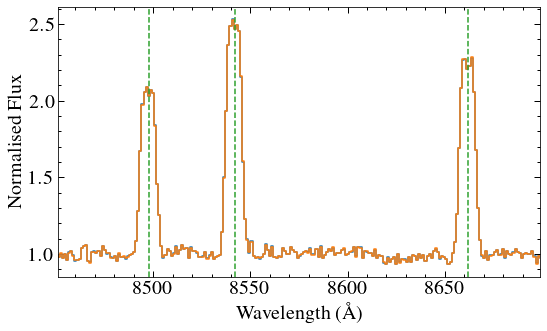

In [111]:
plt.figure(figsize=(8,5))
lines = [8498.02,8542.09,8662.14]   

# smooth = 4
fs = []
es = []
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    if star == 'WDJ0846+5703_066_E': 
        w, f, e = data[0], data[1], data[3]
        # f = convolve(f,Box1DKernel(smooth))
        # fs = []
        if w[-1] > 9000:
            mask1 = (w > 8435) & (w < 8440) |(w > 8470) & (w < 8480) | (w > 8520) & (w < 8522) | (w > 8565)  & (w< 8638) | (w > 8685) & (w < 8750)
            mask2 = (w> 8450) & (w < 8700) 
            wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=0)
            # plt.plot(wn, en)
            fs.append(fn)
            es.append(en)
            
            # plt.step(w,f, alpha =0.5)
        # fs = 
fs, es = np.array(fs), np.array(es)
fmean = np.average(fs, weights = 1/(es**2), axis=0)
# plt.step(wn, np.mean(np.array(fs), axis=0))
plt.step(wn, fmean)
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Normalised Flux')
plt.xlim(8451, 8699)
[plt.axvline(line, ls='--', c='C2') for line in lines]

plt.tight_layout()            
    
plt.savefig('plots/WDJ0846+5703_20220210_ql.png', facecolor='w')
# plt.ylim (0.1e-16, 4e-16)
    # plt.show()

(1e-16, 2e-16)

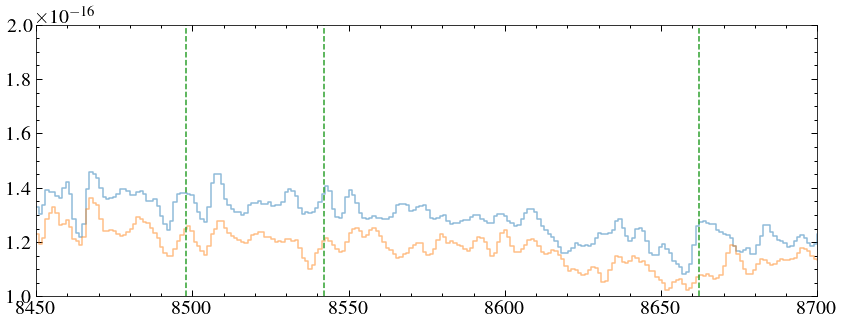

In [114]:
smooth = 4
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    if star == 'WDJ1622+5840_066_E': 
        w, f, e = data[0], data[1], data[3]
        if w [-1] > 9000:
            f = convolve(f,Box1DKernel(smooth))
            plt.step(w,f, alpha =0.5)
[plt.axvline(line, ls='--', c='C2') for line in lines]

plt.xlim(8450, 8700)
plt.ylim(1e-16, 2e-16)
    # plt.show()

 [astropy.modeling.fitting]


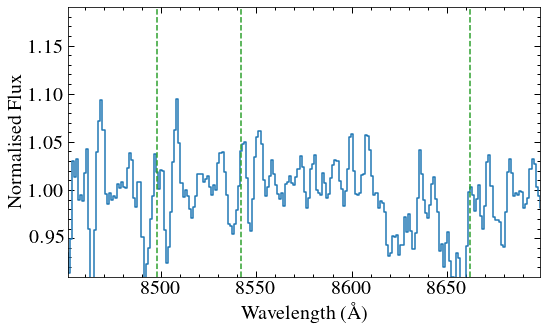

In [127]:
plt.figure(figsize=(8,5))
lines = [8498.02,8542.09,8662.14]   

# smooth = 4
fs = []
es = []
for spec in hetspecs:
    data = fits.getdata(spec)
    star = fits.getheader(spec)['OBJECT']
    if star == 'WDJ1622+5840_066_E': 
        w, f, e = data[0], data[1], data[3]
        # f = convolve(f,Box1DKernel(smooth))
        # fs = []
        if w[-1] > 9000:
            mask1 = (w > 8435) & (w < 8440) |(w > 8470) & (w < 8480) | (w > 8520) & (w < 8522) | (w > 8565)  & (w< 8638) | (w > 8685) & (w < 8750)
            mask2 = (w> 8450) & (w < 8700) 
            wn, fn, en =  make_plot_spec(w, f,e , mask1, mask2, smooth=3)
            # plt.plot(wn, en)
            fs.append(fn)
            es.append(en)
            
            # plt.step(w,f, alpha =0.5)
        # fs = 
fs, es = np.array(fs), np.array(es)
fmean = np.average(fs, weights = 1/(es**2), axis=0)
emean = (1 / np.sum(1/(es**2), axis=0))**0.5
# plt.step(wn, np.mean(np.array(fs), axis=0))
plt.step(wn, fmean)
# plt.errorbar(wn, fmean, emean, alpha=0.5, errorevery=5, ls='none')
plt.xlabel('Wavelength (\AA)')
plt.ylabel('Normalised Flux')
plt.xlim(8451, 8699)
[plt.axvline(line, ls='--', c='C2') for line in lines]
plt.ylim(0.91, 1.19)
plt.tight_layout()            
    
plt.savefig('plots/WDJ1622+5840_20220213_ql.png', facecolor='w')
# plt.ylim (0.1e-16, 4e-16)
    # plt.show()